In [1]:
# 📦 INSTALL REQUIRED LIBRARIES
!pip install -q sentence-transformers scikit-learn nltk diffusers transformers accelerate
!pip install -q matplotlib pillow

# 🔁 Restart runtime after first run to make sure diffusers works properly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00


In [2]:
# ✅ IMPORTS
import nltk
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# For NLP and Embeddings
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# For image generation (Diffusers)
import torch
from diffusers import StableDiffusionPipeline

# For downloads
import os
from io import BytesIO
from IPython.display import display

# ✅ Download required NLTK data
nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

Scene _splitting

In [29]:
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load stronger embedding model
embedding_model = SentenceTransformer('all-mpnet-base-v2')

def evaluate_clustering_quality(embeddings, labels):
    """Compute silhouette score for clustering quality."""
    if len(set(labels)) < 2:
        print("⚠️ Not enough clusters to compute silhouette score.")
        return None
    score = silhouette_score(embeddings, labels)
    print(f"✅ Silhouette Score: {score:.3f}")
    return score

def split_story_with_kmeans(story: str, num_clusters: int = 3, eval_score=True):
    """Split story using KMeans clustering."""
    sentences = sent_tokenize(story)
    if len(sentences) <= num_clusters:
        return sentences

    embeddings = embedding_model.encode(sentences)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)

    if eval_score:
        evaluate_clustering_quality(embeddings, labels)

    scene_clusters = {i: [] for i in range(num_clusters)}
    for label, sentence in zip(labels, sentences):
        scene_clusters[label].append(sentence)

    scenes = [' '.join(scene_clusters[i]) for i in sorted(scene_clusters)]
    return scenes


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
from sklearn.cluster import AgglomerativeClustering

def split_story_with_agglomerative(story: str, num_clusters: int = 3, eval_score=True):
    """Split story using Agglomerative Clustering."""
    sentences = sent_tokenize(story)
    if len(sentences) <= num_clusters:
        return sentences

    embeddings = embedding_model.encode(sentences)
    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    labels = clustering.fit_predict(embeddings)

    if eval_score:
        evaluate_clustering_quality(embeddings, labels)

    scene_clusters = {i: [] for i in range(num_clusters)}
    for label, sentence in zip(labels, sentences):
        scene_clusters[label].append(sentence)

    scenes = [' '.join(scene_clusters[i]) for i in sorted(scene_clusters)]
    return scenes


In [32]:
sample_story = """
A robot awakens alone in a ruined city. Buildings lie in rubble and smoke clouds the sky.
The machine walks through the devastation, scanning its surroundings with glowing eyes.

Far away, in a high-tech lab, a scientist monitors the robot’s feed. She takes notes rapidly.
She zooms in on an approaching storm front.

Meanwhile, a group of scavengers set up camp inside an old metro station. One of them spots the robot on a tablet screen.
They debate whether it's dangerous or useful.

Suddenly, a mutated creature leaps from the shadows. The robot blocks its claws with a metal arm.
Alarms go off in the lab as the scientist shouts to her assistant.

The robot deploys a drone that emits a blinding flash. The creature flees.
Back in the camp, the scavengers are stunned. They realize the robot just saved them.

The robot turns and walks away into the fog. The scientist smiles — the AI passed its first test.
"""


print("\n🔹 KMeans Clustering:")
scenes_kmeans = split_story_with_kmeans(sample_story, num_clusters=3)


print("\n🔹 Agglomerative Clustering:")
scenes_agglo = split_story_with_agglomerative(sample_story, num_clusters=3)
print("🔹 Extracted Scenes:")
for i, scene in enumerate(scenes):
    print(f"\n🧩 Scene {i+1}:\n{scene}")


🔹 KMeans Clustering:
✅ Silhouette Score: 0.049

🔹 Agglomerative Clustering:
✅ Silhouette Score: 0.080
🔹 Extracted Scenes:

🧩 Scene 1:
A howl echoed in the distance, sending chills down his spine. He tightened his grip on the sword and moved forward. The battle was swift and fierce. Victorious but wounded, he pressed on toward the ancient temple.

🧩 Scene 2:
Suddenly, a mystical creature emerged from the mist. There, the hooded wizard awaited, holding secrets of the past.

🧩 Scene 3:

The warrior stepped into the dark forest, unaware of the glowing eyes watching him.


In [43]:
# ✅ Install dependencies (if needed)
!pip install -q sentence-transformers scikit-learn nltk hdbscan

import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import hdbscan

# ✅ Load embedding model
embedding_model = SentenceTransformer('all-mpnet-base-v2')

# ✅ Helper: Combine every n sentences into a single chunk
def chunk_text(sentences, chunk_size=2):
    return [' '.join(sentences[i:i+chunk_size]) for i in range(0, len(sentences), chunk_size)]

# ✅ Optional evaluation
def evaluate_clustering_quality(embeddings, labels):
    if len(set(labels)) < 2:
        print("⚠️ Not enough clusters to compute silhouette score.")
        return None
    score = silhouette_score(embeddings, labels)
    print(f"✅ Silhouette Score: {score:.3f}")
    return score


# ✅ Agglomerative Clustering
def split_story_agglomerative(story: str, num_clusters=3, chunk_size=2):
    sentences = sent_tokenize(story)
    chunks = chunk_text(sentences, chunk_size)
    embeddings = embedding_model.encode(chunks)

    clustering = AgglomerativeClustering(n_clusters=num_clusters)
    labels = clustering.fit_predict(embeddings)

    evaluate_clustering_quality(embeddings, labels)

    scenes = {i: [] for i in range(num_clusters)}
    for label, chunk in zip(labels, chunks):
        scenes[label].append(chunk)

    return [' '.join(scenes[i]) for i in sorted(scenes)]


# 🧪 Sample test story (you can replace this)
sample_story = """
A robot awakens alone in a ruined city. Buildings lie in rubble and smoke clouds the sky.
The machine walks through the devastation, scanning its surroundings with glowing eyes.

Far away, in a high-tech lab, a scientist monitors the robot’s feed. She takes notes rapidly.
She zooms in on an approaching storm front.

Meanwhile, a group of scavengers set up camp inside an old metro station. One of them spots the robot on a tablet screen.
They debate whether it's dangerous or useful.

Suddenly, a mutated creature leaps from the shadows. The robot blocks its claws with a metal arm.
Alarms go off in the lab as the scientist shouts to her assistant.

The robot deploys a drone that emits a blinding flash. The creature flees.
Back in the camp, the scavengers are stunned. They realize the robot just saved them.

The robot turns and walks away into the fog. The scientist smiles — the AI passed its first test.
"""



# ✅ Run all 3 methods and print scenes

print("\n🔹 Agglomerative Clustering:")
scenes_agglo = split_story_agglomerative(sample_story, num_clusters=3)
for i, scene in enumerate(scenes_agglo): print(f"\n📖 Scene {i+1}:\n{scene}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



🔹 Agglomerative Clustering:
✅ Silhouette Score: 0.128

📖 Scene 1:

A robot awakens alone in a ruined city. Buildings lie in rubble and smoke clouds the sky. The machine walks through the devastation, scanning its surroundings with glowing eyes. Far away, in a high-tech lab, a scientist monitors the robot’s feed. Meanwhile, a group of scavengers set up camp inside an old metro station. One of them spots the robot on a tablet screen. The robot blocks its claws with a metal arm. Alarms go off in the lab as the scientist shouts to her assistant. The robot deploys a drone that emits a blinding flash. The creature flees. Back in the camp, the scavengers are stunned. They realize the robot just saved them. The robot turns and walks away into the fog. The scientist smiles — the AI passed its first test.

📖 Scene 2:
They debate whether it's dangerous or useful. Suddenly, a mutated creature leaps from the shadows.

📖 Scene 3:
She takes notes rapidly. She zooms in on an approaching storm front.


Prompt Enhancer

In [7]:
# 🎨 Prompt Enhancer: Add visual detail to the scene

VISUAL_STYLE = [
    "cinematic lighting", "fantasy art", "concept art", "digital painting",
    "8k ultra-detailed", "dark atmospheric", "anime style", "comic style"
]

CHARACTER_BOOSTS = [
    "warrior with glowing sword", "hooded wizard", "mystical creature",
    "armored knight", "steampunk hunter", "cyberpunk agent"
]

ENVIRONMENT_BOOSTS = [
    "enchanted forest", "burning ruins", "icy mountain cave",
    "floating castle", "ancient temple", "alien landscape"
]

KEYWORD_THEMES = {
    "dragon": ("fire-breathing dragon", "volcanic cliff"),
    "wizard": ("ancient sorcerer", "mystical tower"),
    "warrior": ("armored knight", "ruined battlefield"),
    "forest": ("ranger with bow", "enchanted forest"),
    "robot": ("futuristic robot", "sci-fi cityscape")
}

def enhance_scene(scene_text: str, debug: bool = False) -> str:
    """Add visual detail based on scene content + randomness."""
    text_lower = scene_text.lower()
    character = random.choice(CHARACTER_BOOSTS)
    environment = random.choice(ENVIRONMENT_BOOSTS)

    for keyword, (char_boost, env_boost) in KEYWORD_THEMES.items():
        if keyword in text_lower:
            character = char_boost
            environment = env_boost
            break

    style = random.choice(VISUAL_STYLE)
    enhanced = f"{scene_text.strip()}, featuring a {character}, set in a {environment}, {style}"

    if debug:
        print(f"[DEBUG] Original: {scene_text}")
        print(f"[DEBUG] Enhanced: {enhanced}")

    return enhanced


In [8]:
# 🧪 Apply enhancer to extracted scenes

enhanced_prompts = [enhance_scene(scene, debug=True) for scene in scenes]


[DEBUG] Original: A howl echoed in the distance, sending chills down his spine. He tightened his grip on the sword and moved forward. The battle was swift and fierce. Victorious but wounded, he pressed on toward the ancient temple.
[DEBUG] Enhanced: A howl echoed in the distance, sending chills down his spine. He tightened his grip on the sword and moved forward. The battle was swift and fierce. Victorious but wounded, he pressed on toward the ancient temple., featuring a cyberpunk agent, set in a floating castle, digital painting
[DEBUG] Original: Suddenly, a mystical creature emerged from the mist. There, the hooded wizard awaited, holding secrets of the past.
[DEBUG] Enhanced: Suddenly, a mystical creature emerged from the mist. There, the hooded wizard awaited, holding secrets of the past., featuring a ancient sorcerer, set in a mystical tower, cinematic lighting
[DEBUG] Original: 
The warrior stepped into the dark forest, unaware of the glowing eyes watching him.
[DEBUG] Enhanced:

Image generator (Diffusion Model)

In [9]:
from diffusers import StableDiffusionPipeline
import torch

# ✅ Load the model (takes ~1 min)
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

# ✅ Use half-precision (faster and less memory)
pipe.enable_attention_slicing()


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
def generate_image(prompt: str, output_path: str = "comic_scene.png", height=512, width=512):
    """Generate and save an image from a text prompt using Stable Diffusion."""
    image = pipe(prompt, height=height, width=width).images[0]
    image.save(output_path)
    print(f"✅ Image saved to: {output_path}")
    display(image)


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image saved to: scene_test.png


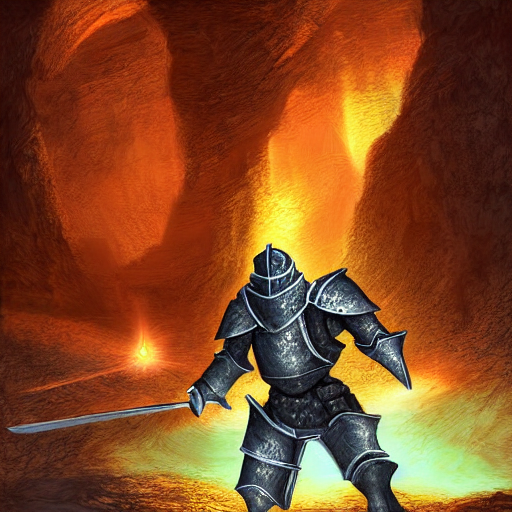

In [12]:
# Example prompt from prompt_enhancer
test_prompt = enhance_scene("The warrior steps into a glowing cave.")

# Generate image
generate_image(test_prompt, output_path="scene_test.png")



🔹 Scene 1:
📜 Original Scene: A howl echoed in the distance, sending chills down his spine. He tightened his grip on the sword and moved forward. The battle was swift and fierce. Victorious but wounded, he pressed on toward the ancient temple.
🎨 Enhanced Prompt: A howl echoed in the distance, sending chills down his spine. He tightened his grip on the sword and moved forward. The battle was swift and fierce. Victorious but wounded, he pressed on toward the ancient temple., featuring a cyberpunk agent, set in a floating castle, digital painting


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image saved to: scene_1.png


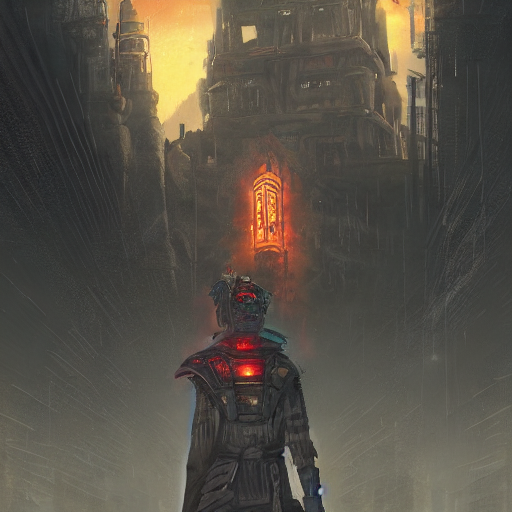


🔹 Scene 2:
📜 Original Scene: Suddenly, a mystical creature emerged from the mist. There, the hooded wizard awaited, holding secrets of the past.
🎨 Enhanced Prompt: Suddenly, a mystical creature emerged from the mist. There, the hooded wizard awaited, holding secrets of the past., featuring a ancient sorcerer, set in a mystical tower, cinematic lighting


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image saved to: scene_2.png


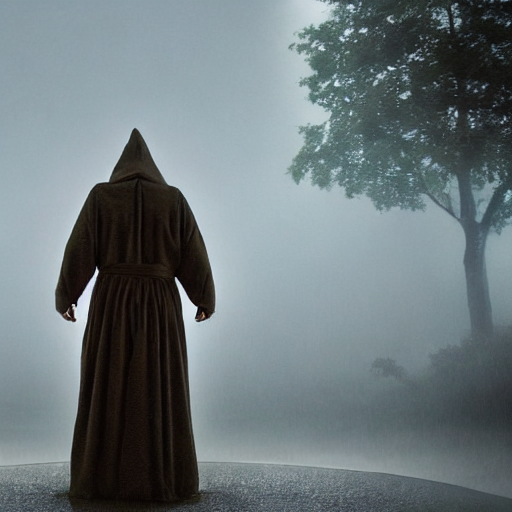


🔹 Scene 3:
📜 Original Scene: 
The warrior stepped into the dark forest, unaware of the glowing eyes watching him.
🎨 Enhanced Prompt: The warrior stepped into the dark forest, unaware of the glowing eyes watching him., featuring a armored knight, set in a ruined battlefield, anime style


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image saved to: scene_3.png


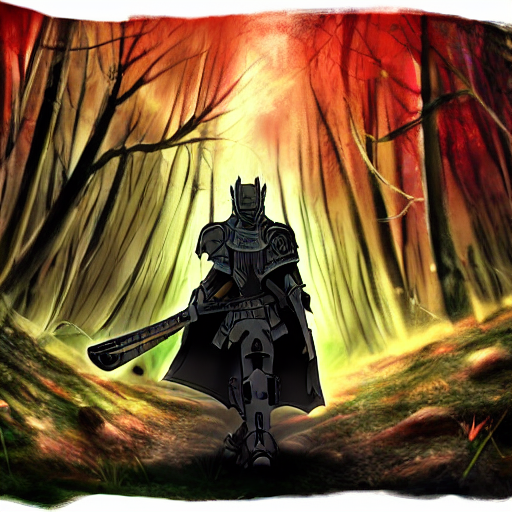

In [14]:
for i, (prompt, scene_text) in enumerate(zip(enhanced_prompts, scenes)):
    output_file = f"scene_{i+1}.png"
    print(f"\n🔹 Scene {i+1}:")
    print(f"📜 Original Scene: {scene_text}")
    print(f"🎨 Enhanced Prompt: {prompt}")

    generate_image(prompt, output_file)


In [15]:
from PIL import Image, ImageDraw, ImageFont

def build_comic_strip(image_paths, scene_texts, output_path="final_comic_strip.png", grid_cols=2):
    """Combine images and captions into a comic strip layout."""

    # Image size (assuming all are 512x512)
    panel_width, panel_height = 512, 512
    caption_height = 60

    total_panels = len(image_paths)
    grid_rows = (total_panels + grid_cols - 1) // grid_cols

    # New canvas: width × height
    canvas_width = grid_cols * panel_width
    canvas_height = grid_rows * (panel_height + caption_height)
    comic_canvas = Image.new("RGB", (canvas_width, canvas_height), color="white")

    draw = ImageDraw.Draw(comic_canvas)
    try:
        font = ImageFont.truetype("arial.ttf", size=16)
    except:
        font = ImageFont.load_default()

    for idx, (img_path, caption) in enumerate(zip(image_paths, scene_texts)):
        img = Image.open(img_path).resize((panel_width, panel_height))
        row = idx // grid_cols
        col = idx % grid_cols

        # Coordinates for panel image
        x = col * panel_width
        y = row * (panel_height + caption_height)

        # Paste panel
        comic_canvas.paste(img, (x, y))

        # Add caption
        caption_position = (x + 10, y + panel_height + 5)
        draw.text(caption_position, caption.strip(), font=font, fill="black")

    comic_canvas.save(output_path)
    print(f"✅ Comic strip saved as {output_path}")
    display(comic_canvas)


✅ Comic strip saved as final_comic_strip.png


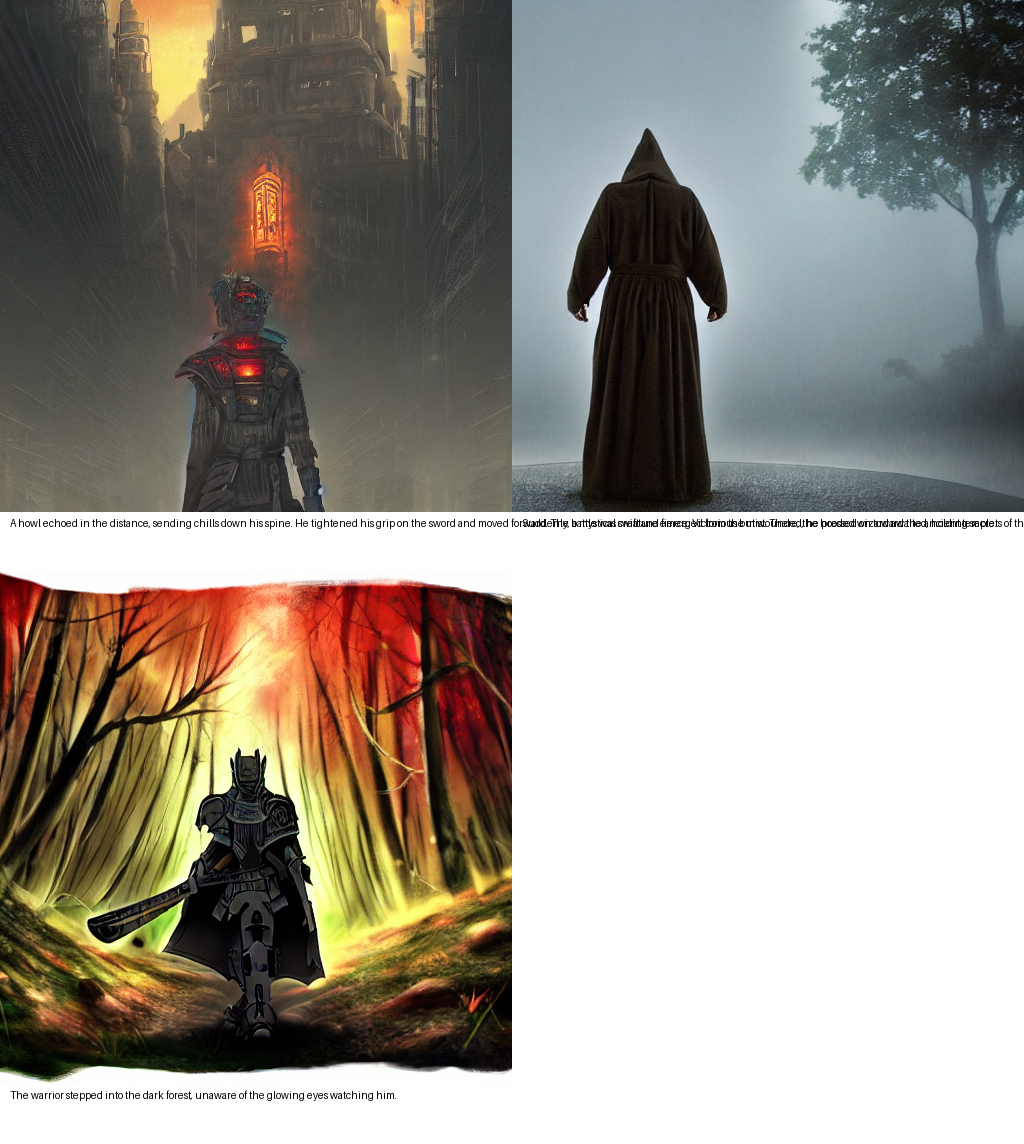

In [16]:
# 🧩 Collect paths and captions
image_paths = [f"scene_{i+1}.png" for i in range(len(enhanced_prompts))]
scene_captions = scenes  # original scene text for captions

# 🧱 Build the strip
build_comic_strip(image_paths, scene_captions)


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
